In [651]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

Создаем даннуе, стоимость ноутбука от его характеристик (RAM, SSD, graphics, core). Цену генерирум через комбинацию трех признаков, четвертый (RAM) не используется.
После в данные core 2% данных заменяются на выбросы.

In [652]:
# Создаём сэмпл
n_samples = 1000

RAM = [1, 2, 4, 8, 16]
laptop_ram = np.random.choice(RAM, n_samples)
SSD = [128, 256, 512, 1024, 2048]
laptop_ssd = np.random.choice(SSD, n_samples)
graphics = [0.256, 0.512, 1, 2, 4, 6]
laptop_graphics = np.random.choice(graphics, n_samples)
core = [1, 2, 4, 8]
laptop_core = np.random.choice(core, n_samples)

price = 100 * laptop_ssd + laptop_graphics * laptop_core * 15000 + 15000

for i in range(20):
    laptop_core[np.random.randint(1, n_samples)] += np.random.randint(25, 50)

data = pd.DataFrame({'laptop_ram': laptop_ram, 'laptop_ssd': laptop_ssd, 'laptop_graphics': laptop_graphics, 'laptop_core': laptop_core, 'price': price})
data.head(5)

,laptop_ram,laptop_ssd,laptop_graphics,laptop_core,price
0,16,1024,0.256,4,132760.0
1,16,256,2.000,1,70600.0
2,1,256,2.000,2,100600.0
3,2,512,6.000,2,246200.0
4,16,512,2.000,1,96200.0


Обучаем модель на всех признаках

In [653]:
from sklearn.metrics import mean_absolute_error

X = data[['laptop_ram', 'laptop_ssd', 'laptop_graphics', 'laptop_core']]
y = data['price']
reg = LinearRegression().fit(X, y)

print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['laptop_ram', 'laptop_ssd', 'laptop_graphics', 'laptop_core']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [  462.59125449    92.37929442 54935.2155235   7319.26939852]
Bias: -11764.518093941413
Error: 67899.83155344038


Строим зависимость признаков друг от друга 

<AxesSubplot:>

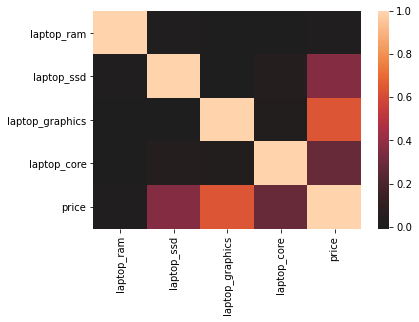

In [654]:
cor = data.corr()
sns.heatmap(cor, center=0)

Видим, что price не зависит от laptop_ram и проводим обучение уже на трех признаках 

In [655]:
X = data[['laptop_ssd', 'laptop_graphics', 'laptop_core']]
y = data['price']
reg = LinearRegression().fit(X, y)

print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['laptop_ssd', 'laptop_graphics', 'laptop_core']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [   92.44710744 54927.7973138   7315.40447107]
Bias: -8917.656252773682
Error: 67673.60095909648


Ошибка не изменилась,
строим гистограммы данных 

In [656]:
import  matplotlib.pyplot as plt

(array([378.,   0., 191.,   0., 224.,   0.,   0.,   0.,   0., 207.]),
 array([ 128.,  320.,  512.,  704.,  896., 1088., 1280., 1472., 1664.,
        1856., 2048.]),
 <BarContainer object of 10 artists>)

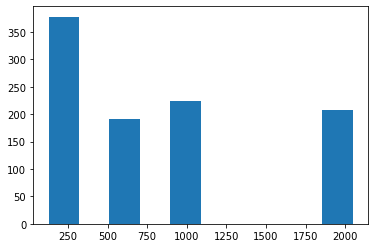

In [657]:
plt.hist(laptop_ssd)

(array([316., 176.,   0., 168.,   0.,   0., 152.,   0.,   0., 188.]),
 array([0.256 , 0.8304, 1.4048, 1.9792, 2.5536, 3.128 , 3.7024, 4.2768,
        4.8512, 5.4256, 6.    ]),
 <BarContainer object of 10 artists>)

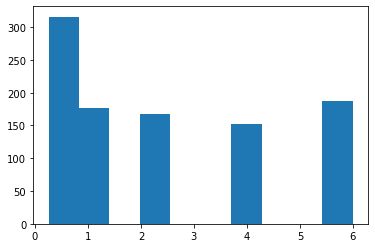

In [658]:
plt.hist(laptop_graphics)

(array([761., 219.,   0.,   0.,   0.,   5.,   4.,   5.,   1.,   5.]),
 array([ 1. ,  6.6, 12.2, 17.8, 23.4, 29. , 34.6, 40.2, 45.8, 51.4, 57. ]),
 <BarContainer object of 10 artists>)

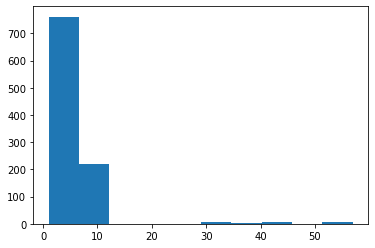

In [659]:
plt.hist(laptop_core)

Видим, что в данных laptop_core  присутствуют выбрасы. Пытаемся поменять эти значения на медианные по выборке. Также получаем второй набор данных (data_2) в котором удаляем выбрасы

In [660]:
core_2 = [np.nan]
laptop_core_2 = np.random.choice(core_2, n_samples)
for i in range(n_samples):
    if laptop_core[i] > 12:        
        laptop_core[i] = data['laptop_core'].median()
    else:
        laptop_core_2[i] = laptop_core[i]



In [661]:
data_2 = pd.DataFrame({'laptop_ram': laptop_ram, 'laptop_ssd': laptop_ssd, 'laptop_graphics': laptop_graphics, 'laptop_core_2': laptop_core_2, 'price': price})
data_2.head(5)

,laptop_ram,laptop_ssd,laptop_graphics,laptop_core_2,price
0,16,1024,0.256,4.0,132760.0
1,16,256,2.000,1.0,70600.0
2,1,256,2.000,2.0,100600.0
3,2,512,6.000,2.0,246200.0
4,16,512,2.000,1.0,96200.0


In [662]:
data_2 = data_2[ pd.isna( data_2['laptop_core_2'] ) == 0 ]

Строим корреляцию между признаками для второго набора данных. Видим что при удалении выбрасов корреляция между price и laptop_core_2 увеличилась

<AxesSubplot:>

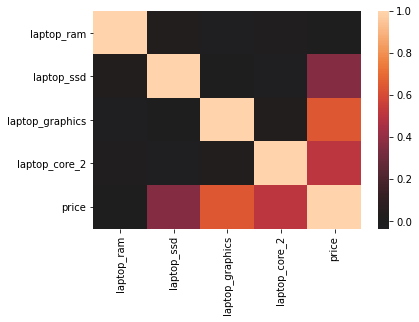

In [663]:
cor = data_2.corr()
sns.heatmap(cor, center=0)

(array([249., 244.,   0.,   0., 288.,   0.,   0.,   0.,   0., 219.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

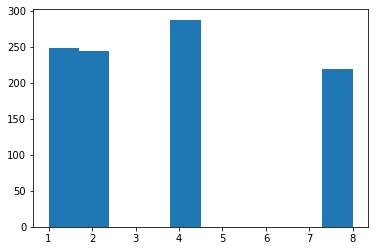

In [664]:
plt.hist(laptop_core)

(array([249., 244.,   0.,   0., 268.,   0.,   0.,   0.,   0., 219.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

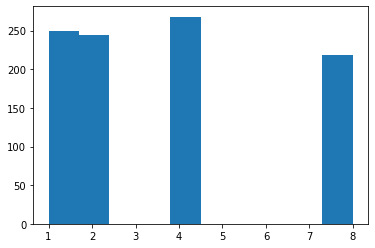

In [665]:
plt.hist(laptop_core_2)

Обучаем на новых данных laptop_core (выбрасо заменены на медианные значения) и laptop_core_2 (выбрасо удалены)

In [666]:
X = data[['laptop_ssd', 'laptop_graphics', 'laptop_core']]
y = data['price']
reg = LinearRegression().fit(X, y)

print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['laptop_ssd', 'laptop_graphics', 'laptop_core']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [   92.44710744 54927.7973138   7315.40447107]
Bias: -8917.656252773682
Error: 67673.60095909648


In [667]:
X = data_2[['laptop_ssd', 'laptop_graphics', 'laptop_core_2']]
y = data_2['price']
reg = LinearRegression().fit(X, y)

print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data_2[['laptop_ssd', 'laptop_graphics', 'laptop_core_2']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [  100.39260252 54242.29442443 35867.76521613]
Bias: -112635.15216361475
Error: 59014.62046244251


Ошибка отличается

Генерируем признак через комбинацию двух других признаков laptop_core и laptop_core_2

In [668]:
data['mult'] = data['laptop_graphics'] * data['laptop_core']
data.head(5)

,laptop_ram,laptop_ssd,laptop_graphics,laptop_core,price,mult
0,16,1024,0.256,4,132760.0,1.024
1,16,256,2.000,1,70600.0,2.000
2,1,256,2.000,2,100600.0,4.000
3,2,512,6.000,2,246200.0,12.000
4,16,512,2.000,1,96200.0,2.000


In [669]:
data_2['mult'] = data_2['laptop_graphics'] * data_2['laptop_core_2']
data_2.head(5)

,laptop_ram,laptop_ssd,laptop_graphics,laptop_core_2,price,mult
0,16,1024,0.256,4.0,132760.0,1.024
1,16,256,2.000,1.0,70600.0,2.000
2,1,256,2.000,2.0,100600.0,4.000
3,2,512,6.000,2.0,246200.0,12.000
4,16,512,2.000,1.0,96200.0,2.000


Проводим обучение с помощью нового признака

In [670]:
X = data[['mult', 'laptop_ssd']]
y = data['price']
reg = LinearRegression().fit(X, y)

print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['mult', 'laptop_ssd']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [4213.57173741   90.95986308]
Bias: 108573.98719339482
Error: 92101.70591968538


In [671]:
X = data_2[['mult', 'laptop_ssd']]
y = data_2['price']
reg = LinearRegression().fit(X, y)

print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data_2[['mult', 'laptop_ssd']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [15000.   100.]
Bias: 15000.000000000087
Error: 7.717712183615991e-11


Ошибки отличаютя на много. Получаем, что удаление плохих данных ведет к лучшему результату, чем замена на медианное значение если они их не так много и они не влияют на размер данных.